# Import Modules

In [1]:
import pandas as pd

import utils

# Load Data

In [2]:
target_vegetable = "だいこん"

In [3]:
train = pd.read_csv("./data/train.csv")
train["date"] = pd.to_datetime(train["date"], format="%Y%m%d")

train["year"] = train.date.dt.year
years = pd.get_dummies(train["year"])
train = train.drop(columns="year")
train = pd.concat([train, years], axis=1)

train["month"] = train.date.dt.month
months = pd.get_dummies(train["month"])
train = train.drop(columns="month")
train = pd.concat([train, months], axis=1)

train["weekday"] = train.date.dt.weekday
weekdays = pd.get_dummies(train["weekday"])
train = train.drop(columns="weekday")
train = pd.concat([train, weekdays], axis=1)

areas = pd.get_dummies(train["area"])
train = train.drop(columns="area")
train = pd.concat([train, areas], axis=1)

target_values = utils.get_target_values(train, target_vegetable)
train_x, train_y, test_y, train, test, ss = utils.preprocess_data(target_values, train_size=4000, T=10)

# Training

In [4]:
pred_y = utils.pipeline_rnn(train_x, train_y, train, test, test_y, num_epochs=100)

training loss = 1.0072927474975586
test loss = 0.7375497817993164
training loss = 0.4005875885486603
test loss = 4.869888782501221
training loss = 0.23469236493110657
test loss = 0.614947497844696
training loss = 0.20996157824993134
test loss = 22.913963317871094
training loss = 0.20022720098495483
test loss = 0.5613081455230713
training loss = 0.19889618456363678
test loss = 0.4884597957134247
training loss = 0.2033158838748932
test loss = 0.7745409607887268
training loss = 0.19857251644134521
test loss = 0.4991718828678131
training loss = 0.19676698744297028
test loss = 0.5096674561500549
training loss = 0.1952134519815445
test loss = 0.5220200419425964


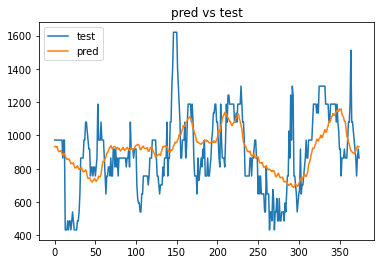

In [5]:
utils.plot_prediction(pred_y, test_y, ss)